In [31]:
#Name: Arnuv VIjay
#Project name: Banana Disease Classification
#Description: The goal of this project is to evaluate, using a machine learning model, if an image of a banana is one of a diseased banana or one of a healthy banana.
#Algorithms used: Decision tree classifier and K-Nearest Neighbors, cv2 is used to load images and for feature extraction that the model can use.


In [32]:
import os
import cv2 # OpenCV for image loading and feature extraction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# --- Configuration and assigning where the data is being collected from ---
DATA_ROOT = r"C:\Users\arnuv\Downloads\New folder" # path to the dataset
TRAIN_DIR = os.path.join(DATA_ROOT, 'train_data')
TEST_DIR = os.path.join(DATA_ROOT, 'test_data')

IMAGE_SIZE = (128, 128)
CLASS_NAMES = ['diseased', 'healthy'] # names of the folders with the images of the healthy and diseased banana photos

--- Data Exploration: Visualize Class Imbalance (Before Preprocessing) ---
Training Data Class Distribution:
       Class  Count
0  diseased    484
1   healthy    484


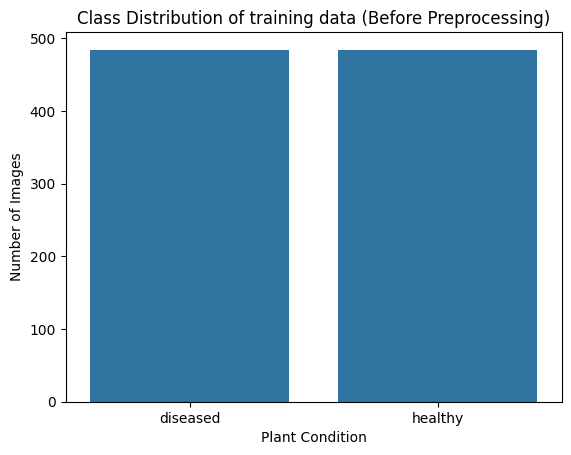

In [33]:
# Data Exploration
print("--- Data Exploration: Visualize Class Imbalance (Before Preprocessing) ---")

#Counts images in the training folders
class_counts = {}
for class_name in CLASS_NAMES:
    class_path = os.path.join(TRAIN_DIR, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

# Creating a dataframe and then visulatizing the data
df_counts = pd.DataFrame(class_counts.items(), columns=['Class', 'Count'])
print("Training Data Class Distribution:\n", df_counts)

# using seaborn to create the bar plot to visualize
sns.barplot(x='Class', y='Count', data=df_counts)
plt.title('Class Distribution of training data (Before Preprocessing)')
plt.xlabel('Plant Condition')
plt.ylabel('Number of Images')
plt.show()

In [34]:
# Data preprocessing and Feature Extraction.
print("\n--- Data Preprocessing: Feature Extraction (Color Histograms) ---")

def extract_color_histogram(image, bins=(8, 8, 8)):
    # Extract a 3D color histogram from the HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])
    
    # Normalize the histogram
    cv2.normalize(hist, hist)
    
    # Flatten the histogram to create a feature vector
    return hist.flatten()

def create_feature_dataset(data_dir):
    features = []
    labels = []
    for label_index, class_name in enumerate(CLASS_NAMES):
        class_path = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):
                filepath = os.path.join(class_path, filename)
                
                #Load and Resize Image
                image = cv2.imread(filepath)
                if image is None:
                    continue
                image = cv2.resize(image, IMAGE_SIZE)
                
                #Extract Features
                feature_vector = extract_color_histogram(image)
                
                #Store Features and Labels
                features.append(feature_vector)
                labels.append(label_index) # 0 for 'diseased', 1 for 'healthy'

    # Convert features list to a Pandas DataFrame
    X = pd.DataFrame(features)
    y = np.array(labels)
    
    # Create column names for the features (for demonstration)
    X.columns = [f'Feature_{i+1}' for i in range(X.shape[1])]
    
    return X, y

# Generate training and test datasets
X_train_full, y_train_full = create_feature_dataset(TRAIN_DIR)
X_test, y_test = create_feature_dataset(TEST_DIR)

# Split training set further into training and validation for Model Evaluation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

print(f"Total Features Extracted (Training + Validation): {X_train_full.shape[0]} images, {X_train_full.shape[1]} features each.")
print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Test Set Size: {X_test.shape[0]} samples")

# This shows which part of the Color Histogram was most effective
feature_importances = model_dt.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Feature Importances from Decision Tree:")
print(importance_df.head(10))


--- Data Preprocessing: Feature Extraction (Color Histograms) ---
Total Features Extracted (Training + Validation): 968 images, 512 features each.
Training Set Size: 774 samples
Test Set Size: 258 samples

Top 10 Feature Importances from Decision Tree:
         Feature  Importance
25    Feature_26    0.437583
115  Feature_116    0.153243
18    Feature_19    0.085794
92    Feature_93    0.041314
135  Feature_136    0.039375
326  Feature_327    0.033706
49    Feature_50    0.030348
100  Feature_101    0.029070
394  Feature_395    0.023074
117  Feature_118    0.015783


In [37]:
#initializing the model and fitting it
print("\n--- Model Building ---")

# Model 1: Decision Tree Classifier
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
model_dt.fit(X_train, y_train)
print("Model 1 (Decision Tree) Trained Successfully.")

# Model 2: K-Nearest Neighbors (KNN)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
print("Model 2 (K-Nearest Neighbors) Trained Successfully.")


--- Model Building ---
Model 1 (Decision Tree) Trained Successfully.
Model 2 (K-Nearest Neighbors) Trained Successfully.



--- Evaluating Model 1: Decision Tree ---

Model 1: Decision Tree Classification Report:
              precision    recall  f1-score   support

    diseased       0.98      0.96      0.97       141
     healthy       0.95      0.97      0.96       117

    accuracy                           0.97       258
   macro avg       0.96      0.97      0.96       258
weighted avg       0.97      0.97      0.97       258



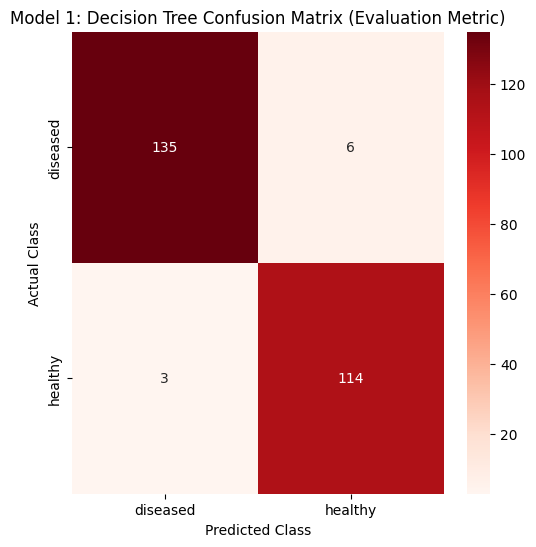

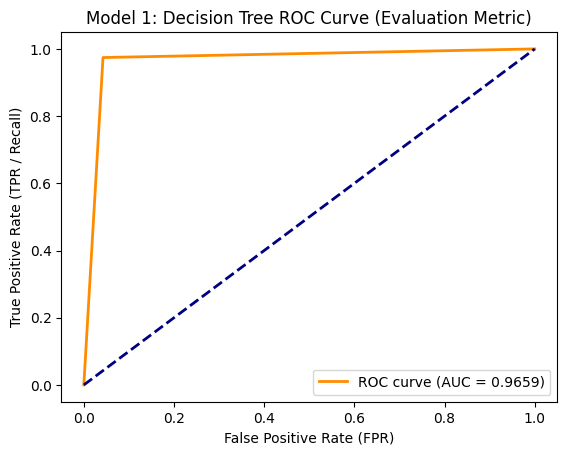


--- Evaluating Model 2: K-Nearest Neighbors ---

Model 2: K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

    diseased       0.90      0.98      0.94       141
     healthy       0.97      0.87      0.92       117

    accuracy                           0.93       258
   macro avg       0.94      0.93      0.93       258
weighted avg       0.93      0.93      0.93       258



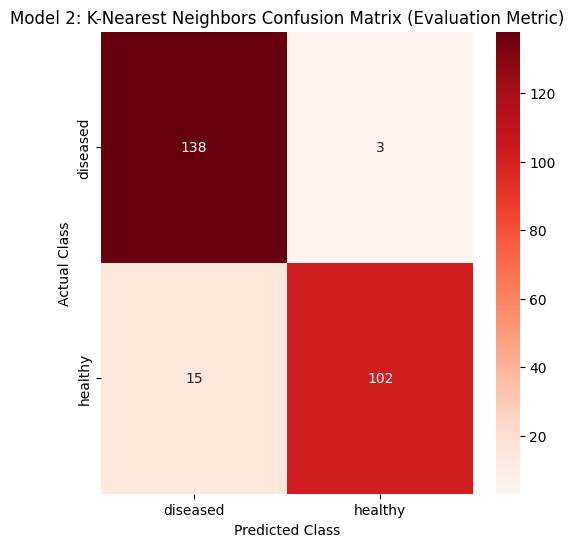

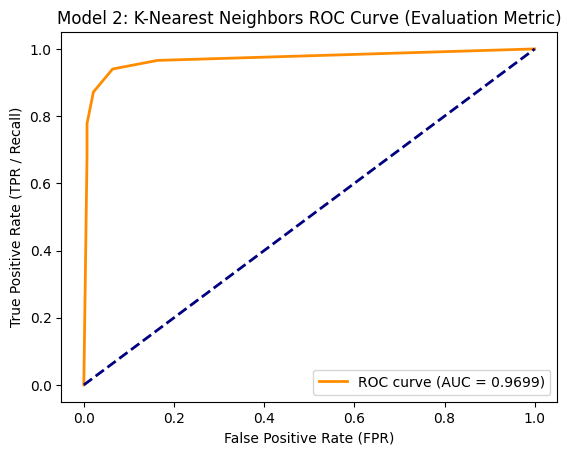


--- Final Model Comparison Summary ---
                       Model  Test Accuracy
0              Decision Tree       0.965116
1  K-Nearest Neighbors (KNN)       0.930233


In [36]:
# Model evaluation and comparison. 


# function to evaluate the model given the data
def evaluate_model(model, X_data, y_true, model_name):
    print(f"\n--- Evaluating {model_name} ---")
    
    # Get predictions
    y_pred = model.predict(X_data)
    y_proba = model.predict_proba(X_data)[:, 1] # Probability for the positive class (1)
    
    # Classification Report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))

    # Confusion Matrix 
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
                xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
    plt.title(f'{model_name} Confusion Matrix (Evaluation Metric)')     
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

    # ROC Curve and AUC Score
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR / Recall)')
    plt.title(f'{model_name} ROC Curve (Evaluation Metric)')     
    plt.legend(loc="lower right")
    plt.show()
    
    return classification_report(y_true, y_pred, output_dict=True)['accuracy']


# Comparing the two models.

# Evaluate Model 1 (Decision Tree)
acc_dt = evaluate_model(model_dt, X_test, y_test, "Model 1: Decision Tree")

# Evaluate Model 2 (KNN)
acc_knn = evaluate_model(model_knn, X_test, y_test, "Model 2: K-Nearest Neighbors")


# Final comparison summary
print("\n--- Final Model Comparison Summary ---")
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'K-Nearest Neighbors (KNN)'],
    'Test Accuracy': [acc_dt, acc_knn]
})
print(comparison_df)